In [1]:
# imports
import matplotlib.pyplot as plt

import kagglehub

import pandas as pd

import numpy as np

import seaborn as sns

In [2]:
# Set the colorblind color palette
sns.set_palette("plasma")

# Dataset 1: Space missions synthetic dataset

In [3]:
# Download latest version
path = kagglehub.dataset_download("sameerk2004/space-missions-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/maud/.cache/kagglehub/datasets/sameerk2004/space-missions-dataset/versions/1


In [4]:
!ls -l $path

total 56
-rw-rw-r-- 1 maud maud 54748 Mar 12 16:55 space_missions_dataset.csv


In [5]:
df_synthetic = pd.read_csv(path + "/space_missions_dataset.csv")
df_synthetic.head()

,Mission ID,Mission Name,Launch Date,Target Type,Target Name,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle
0,MSN-0001,Mission-1,2025-01-01,Star,Titan,Colonization,7.05,5.2,526.68,64.3,21,100.0,731.88,99.78,SLS
1,MSN-0002,Mission-2,2025-01-08,Exoplanet,Betelgeuse,Colonization,41.76,23.0,234.08,84.4,72,89.6,4197.41,45.72,Starship
2,MSN-0003,Mission-3,2025-01-15,Asteroid,Mars,Exploration,49.22,28.8,218.68,98.6,16,98.6,4908.00,36.12,Starship
3,MSN-0004,Mission-4,2025-01-22,Exoplanet,Titan,Colonization,26.33,17.8,232.89,36.0,59,90.0,2569.05,40.67,Starship
4,MSN-0005,Mission-5,2025-01-29,Exoplanet,Proxima b,Mining,8.67,9.2,72.14,96.5,31,73.2,892.76,12.40,Starship


In [6]:
df_synthetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Mission ID                         500 non-null    object 
 1   Mission Name                       500 non-null    object 
 2   Launch Date                        500 non-null    object 
 3   Target Type                        500 non-null    object 
 4   Target Name                        500 non-null    object 
 5   Mission Type                       500 non-null    object 
 6   Distance from Earth (light-years)  500 non-null    float64
 7   Mission Duration (years)           500 non-null    float64
 8   Mission Cost (billion USD)         500 non-null    float64
 9   Scientific Yield (points)          500 non-null    float64
 10  Crew Size                          500 non-null    int64  
 11  Mission Success (%)                500 non-null    float64

In [7]:
df_synthetic.nunique()

Mission ID                           500
Mission Name                         500
Launch Date                          500
Target Type                            5
Target Name                            7
Mission Type                           4
Distance from Earth (light-years)    473
Mission Duration (years)             231
Mission Cost (billion USD)           499
Scientific Yield (points)            393
Crew Size                             99
Mission Success (%)                  184
Fuel Consumption (tons)              500
Payload Weight (tons)                487
Launch Vehicle                         4
dtype: int64

## Distributions

In [8]:
categoical_columns = ['Target Type', 'Target Name', 'Mission Type', 'Launch Vehicle']

for col in categoical_columns:
    print(f"Unique values in {col}:", df_synthetic[col].unique())

Unique values in Target Type: ['Star' 'Exoplanet' 'Asteroid' 'Moon' 'Planet']
Unique values in Target Name: ['Titan' 'Betelgeuse' 'Mars' 'Proxima b' 'Ceres' 'Io' 'Europa']
Unique values in Mission Type: ['Colonization' 'Exploration' 'Mining' 'Research']
Unique values in Launch Vehicle: ['SLS' 'Starship' 'Ariane 6' 'Falcon Heavy']


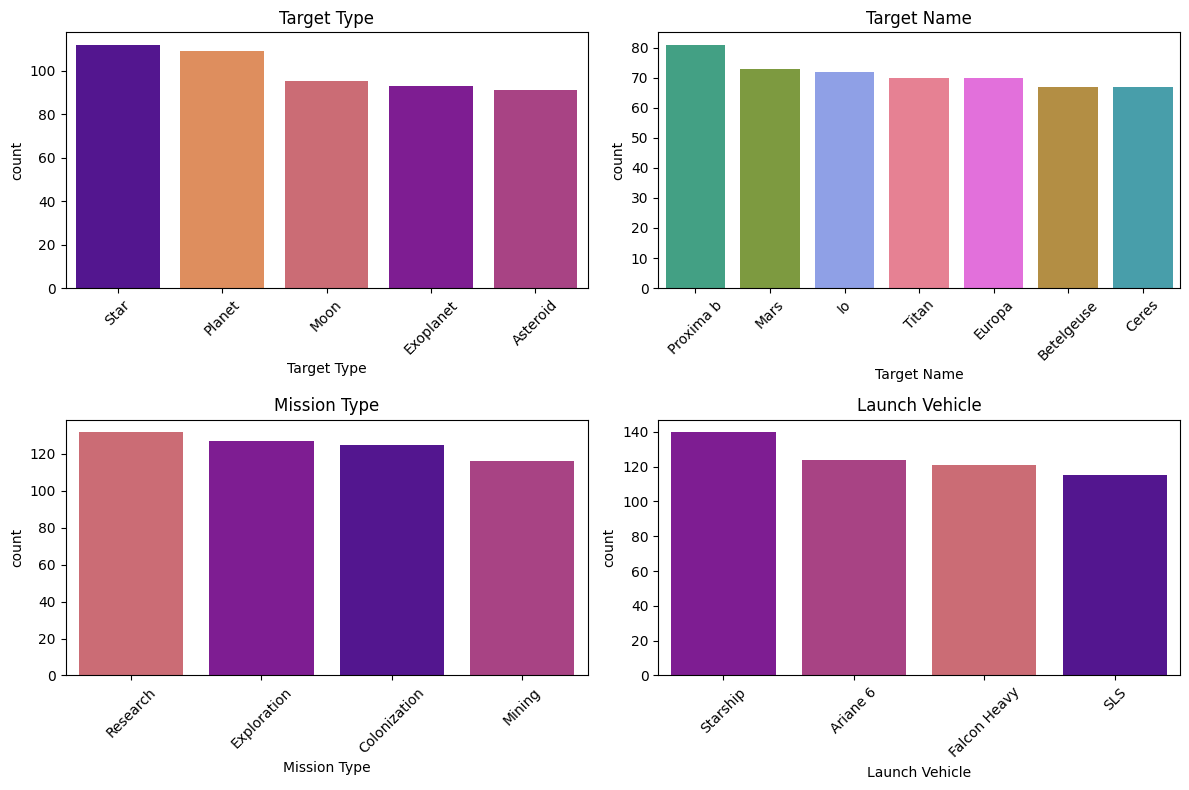

In [9]:
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, col in enumerate(categoical_columns):
    #df_synthetic[col].value_counts().plot(kind='bar', ax=axs[i], rot=45, xlabel='')
    sns.countplot(data=df_synthetic, x=col, ax=axs[i], order=df_synthetic[col].value_counts().index, hue=col)
    axs[i].xaxis.set_tick_params(rotation=45)
    axs[i].set_title(col)

plt.tight_layout()

*Fig 1. Panel of barplots for the value counts of categorical columns*

# Column with continuous numerical values

These columns can further be divided into two categories: scientific and logistics. These values can be used differently in our final project.

In [10]:
continuous_columns = [col for col in df_synthetic.columns if col not in categoical_columns]
col_to_drop = ['Mission ID', 'Mission Name', 'Launch Date']
continuous_columns = [col for col in continuous_columns if col not in col_to_drop]

In [11]:
columns_logistic = []
columns_scientific = ['Distance from Earth (light-years)', 'Mission Duration (years)', 'Scientific Yield (points)', 'Mission Success (%)']
columns_logistic = [col for col in continuous_columns if col not in columns_scientific]

columns_logistic

['Mission Cost (billion USD)',
 'Crew Size',
 'Fuel Consumption (tons)',
 'Payload Weight (tons)']

In [12]:
columns_scientific

['Distance from Earth (light-years)',
 'Mission Duration (years)',
 'Scientific Yield (points)',
 'Mission Success (%)']

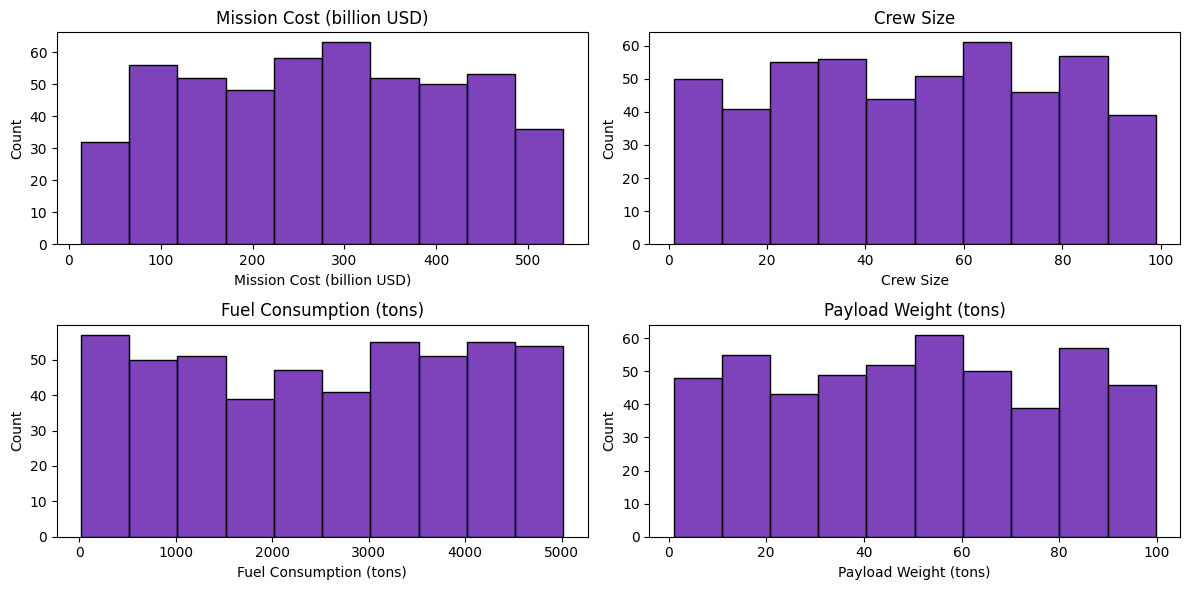

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
axs = axs.flatten()

for i, col in enumerate(columns_logistic):
    sns.histplot(df_synthetic[col], ax=axs[i])   
    axs[i].set_title(col)

plt.tight_layout()

# Save the figure
plt.savefig("figs/histograms_logistic.png")


*Fig 2. Panel of disbtributions of the logistic columns.*

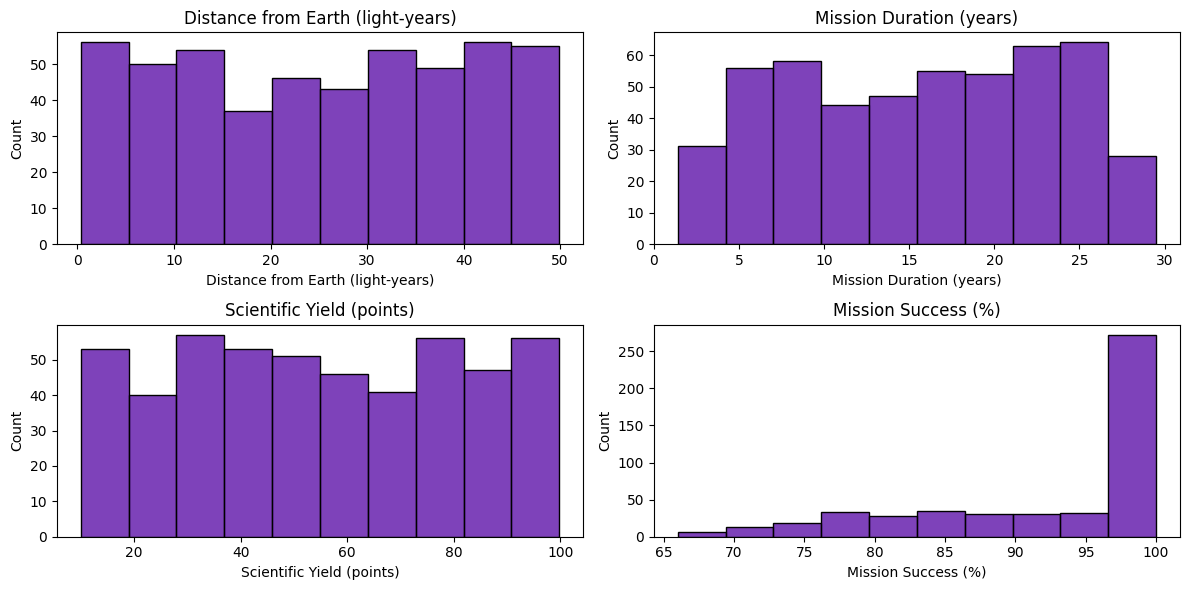

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
axs = axs.flatten()

for i, col in enumerate(columns_scientific):
    sns.histplot(df_synthetic[col], ax=axs[i])   
    axs[i].set_title(col)
plt.tight_layout()

# Save the figure
plt.savefig("figs/histograms_scientific.png")


*Fig 3.  Panel of disbtributions of the scientifics columns.*

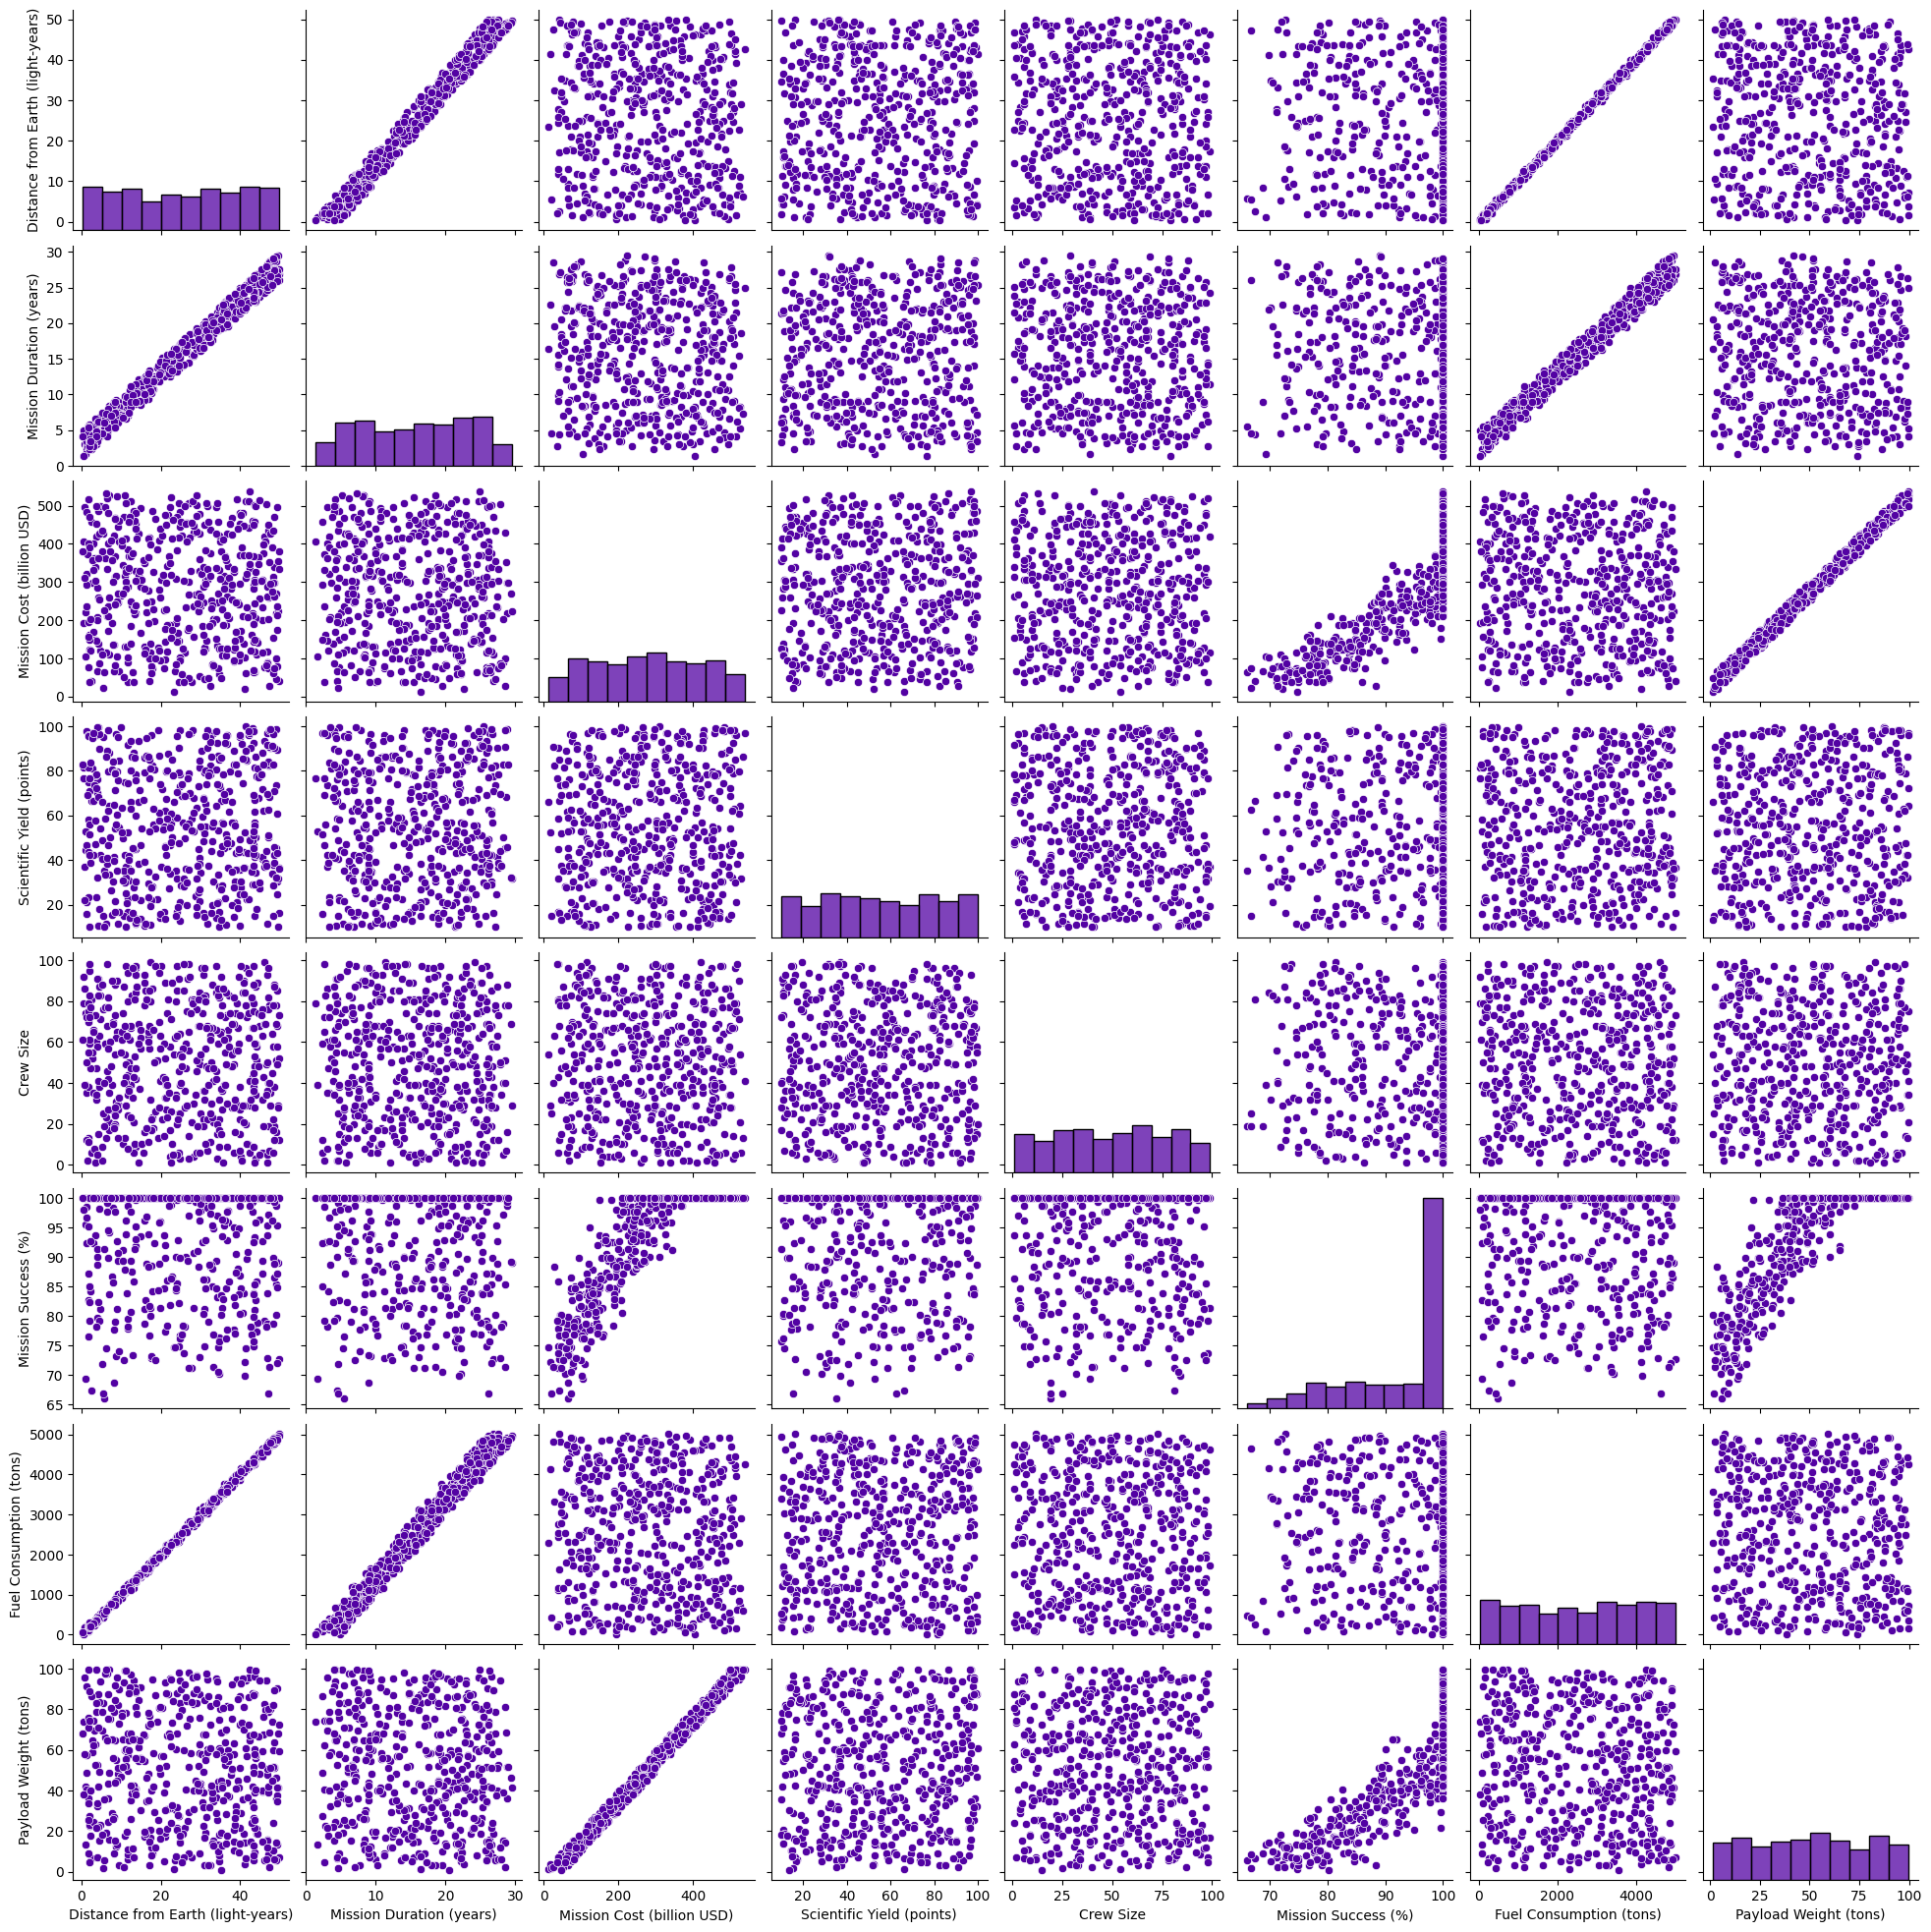

In [15]:
# Make a 8x8 grid of scatter plots
sns.pairplot(df_synthetic[continuous_columns])


**Conclusion**:

* No missing values
* The columns can be separated into: categorical, continuous numerical scientific and continuous numerical logistic.
* All the columns have a balanced distribution except Mission Success
* There is not a high need of data cleaning/processing
* Columns are either not correlated either higly correlated - reflective of the synthetic nature of the dataset

# Dataset 2: Space missions from 1967

In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mysarahmadbhat/space-missions")

print("Path to dataset files:", path)

Path to dataset files: /home/maud/.cache/kagglehub/datasets/mysarahmadbhat/space-missions/versions/1


In [17]:
!ls -lh $path

total 544K
-rw-rw-r-- 1 maud maud 542K Mar 19 16:00 space_missions.csv


In [18]:
df_1957 = pd.read_csv(path + "/space_missions.csv", encoding='ISO-8859-1')
df_1957.shape

(4630, 9)

In [19]:
df_1957.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


In [20]:
df_1957.isna().sum()

Company             0
Location            0
Date                0
Time              127
Rocket              0
Mission             0
RocketStatus        0
Price            3365
MissionStatus       0
dtype: int64

In [21]:
df_1957.nunique()

Company            62
Location          158
Date             4180
Time             1300
Rocket            370
Mission          4556
RocketStatus        2
Price              65
MissionStatus       4
dtype: int64

**Columns of interest**

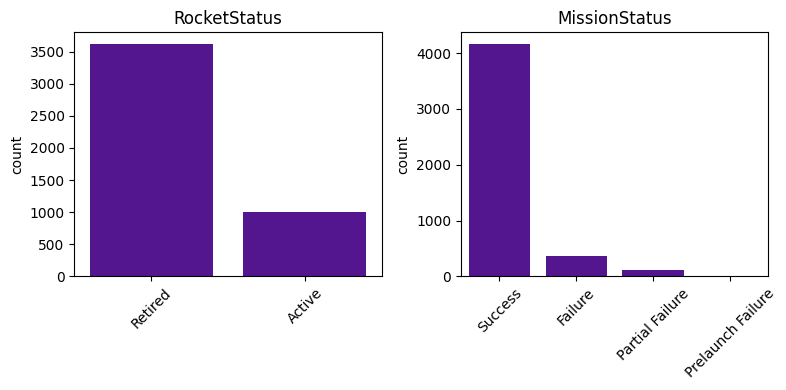

In [22]:
columns = ['RocketStatus', 'MissionStatus']

fig, axs = plt.subplots(1, len(columns), figsize=(8, 4))
axs = axs.flatten()

for i, col in enumerate(columns):
    sns.countplot(data=df_1957, x=col, ax=axs[i], order=df_1957[col].value_counts().index)
    axs[i].xaxis.set_tick_params(rotation=45)
    axs[i].set_title(col)
    axs[i].set_xlabel('')

plt.tight_layout()

In [23]:
# Extract the country from the location
df_1957['Country'] = df_1957['Location'].str.split(',').str[-1].str.strip()
df_1957.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,Country
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success,Kazakhstan
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success,Kazakhstan
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure,USA
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success,USA
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure,USA


In [24]:
# Extract the year from the date
df_1957['Year'] = df_1957['Date'].str.split('-').str[0]
df_1957['Year'] = df_1957['Year'].astype(int)

df_1957.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,Country,Year
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success,Kazakhstan,1957
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success,Kazakhstan,1957
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure,USA,1957
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success,USA,1958
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure,USA,1958


In [25]:
df_1957.nunique()

Company            62
Location          158
Date             4180
Time             1300
Rocket            370
Mission          4556
RocketStatus        2
Price              65
MissionStatus       4
Country            22
Year               66
dtype: int64

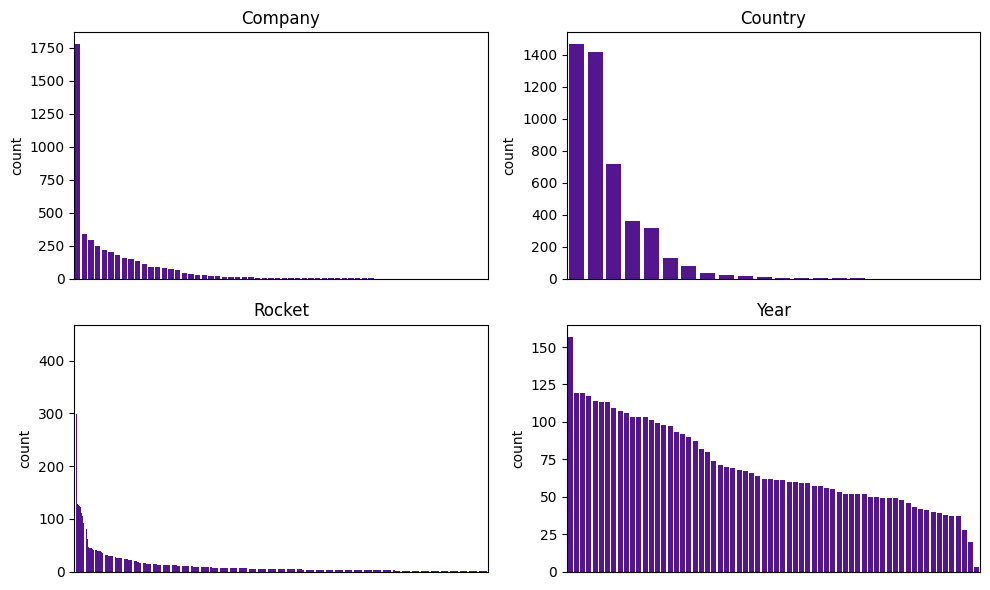

In [26]:
columns = ['Company',  'Country', 'Rocket', 'Year']

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.flatten()

for i, col in enumerate(columns):
    sns.countplot(data=df_1957, x=col, ax=axs[i], order=df_1957[col].value_counts().index)
    axs[i].xaxis.set_tick_params(rotation=45)
    axs[i].set_title(col)
    axs[i].set_xlabel('')

    axs[i].set_xticks([])
plt.tight_layout()

In [27]:
df_1957['Country'].value_counts()   

Country
USA                               1467
Russia                            1416
Kazakhstan                         719
China                              365
France                             318
Japan                              130
India                               82
Pacific Ocean                       36
New Zealand                         28
Iran                                16
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
South Korea                          5
New Mexico                           4
Yellow Sea                           3
Brazil                               3
Barents Sea                          3
Gran Canaria                         2
Pacific Missile Range Facility       1
Shahrud Missile Test Site            1
Name: count, dtype: int64

In [28]:
#!pip install geopandas

import geopandas as gpd
import matplotlib.pyplot as plt

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [29]:
df_1957['Country'] = df_1957['Country'].replace('USA', 'United States of America')

# Count the occurrences of each country in the dataset
country_counts = df_1957['Country'].value_counts()

# Merge the counts with the world GeoDataFrame
world = world.set_index('SOVEREIGNT').join(country_counts.rename('count')).reset_index()

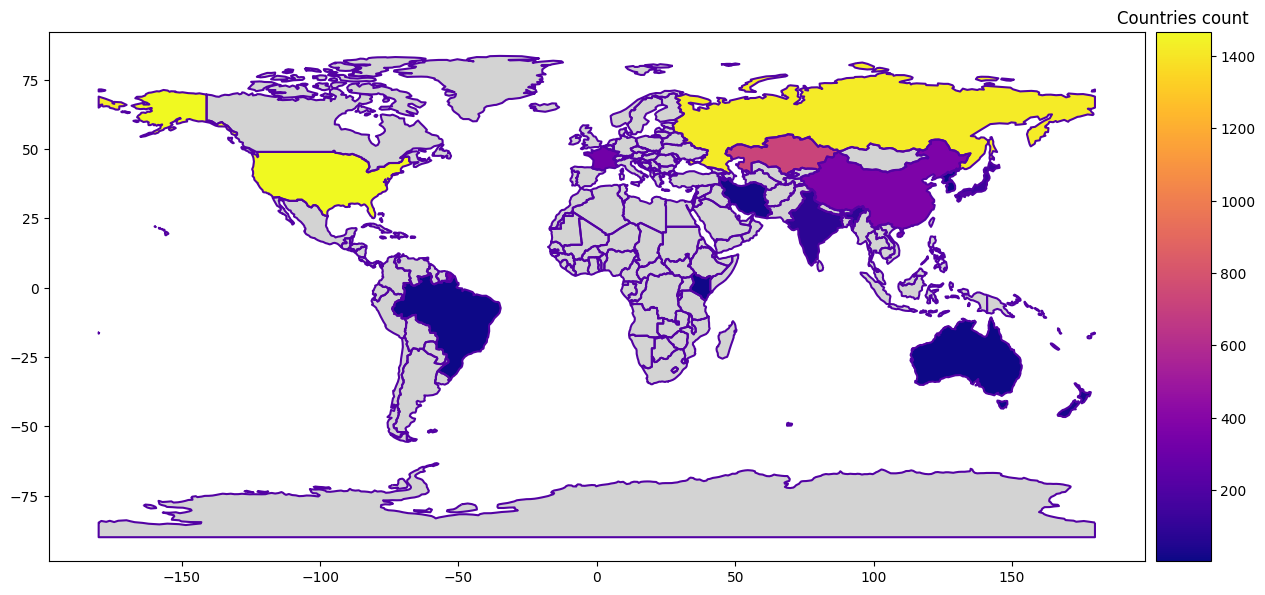

<Figure size 640x480 with 0 Axes>

In [31]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot the map with the countries from the dataframe
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

# Create a divider for the existing axes instance
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Highlight the countries in the dataframe with color reflecting the count
world.plot(column='count', ax=ax, legend=True,cmap='plasma', cax=cax, missing_kwds={'color': 'lightgrey'})

plt.title('Countries count')
plt.show()

plt.savefig("figs/countries_count.png")


## Conclusion
We could make a map of where the missions where launched from, when and by which company.